#Carga de Librerias

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px


### Carga de Dataset y Conexion a Colab


In [11]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [12]:
data_path = '/content/drive/MyDrive/Data.csv'
df = pd.read_csv(data_path, encoding='latin-1')
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [15]:
!cp "/content/drive/MyDrive/modulos.py" "modulos.py"
import modulos

### **Analisis**

In [16]:
df.columns # Determinacion de columnas del dataset

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [17]:
df.shape  # Tamanio de Dataset

(60428, 40)

In [18]:
df.dtypes # Determinado el tipo de columna del dataset

food_category                  object
food_department                object
food_family                    object
store_sales(in millions)      float64
store_cost(in millions)       float64
unit_sales(in millions)       float64
promotion_name                 object
sales_country                  object
marital_status                 object
gender                         object
total_children                float64
education                      object
member_card                    object
occupation                     object
houseowner                     object
avg_cars_at home(approx)      float64
avg. yearly_income             object
num_children_at_home          float64
avg_cars_at home(approx).1    float64
brand_name                     object
SRP                           float64
gross_weight                  float64
net_weight                    float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_type  

In [19]:
df.isnull().sum() # Determinacion de datos vacios en dataset

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

In [20]:
categoric_vars, discrete_vars , continues_vars = modulos.getColumnsDataTypes(df=df)

In [58]:
def getContinuesCols(df):
    colnames = df.columns
    numeric_continues_vars = []
    for col in colnames:
        unique_values =len (df[col].unique())
        if((df[col].dtype != 'object') and (unique_values > 3)):
            numeric_continues_vars.append(col)
    return numeric_continues_vars

In [59]:
numeric_cont_vars = getContinuesCols(df)
numeric_cont_vars

['store_sales(in millions)',
 'store_cost(in millions)',
 'unit_sales(in millions)',
 'total_children',
 'avg_cars_at home(approx)',
 'num_children_at_home',
 'avg_cars_at home(approx).1',
 'SRP',
 'gross_weight',
 'net_weight',
 'units_per_case',
 'store_sqft',
 'grocery_sqft',
 'frozen_sqft',
 'meat_sqft',
 'cost']

In [40]:
def catvars(df):
    catvar = []
    for col in df.columns:
        if (df[col].dtypes == 'object'):
            catvar.append(col)
    return catvar

In [41]:
cat_df = catvars(df)
cat_df

['food_category',
 'food_department',
 'food_family',
 'promotion_name',
 'sales_country',
 'marital_status',
 'gender',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'avg. yearly_income',
 'brand_name',
 'store_type',
 'store_city',
 'store_state',
 'media_type']

In [60]:
def plot_density_variable(df, variable):
    
    plt.figure(figsize = (15,6))
    plt.subplot(121)
    df[variable].hist(bins=30)
    plt.title(variable)
    
    plt.subplot(122)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

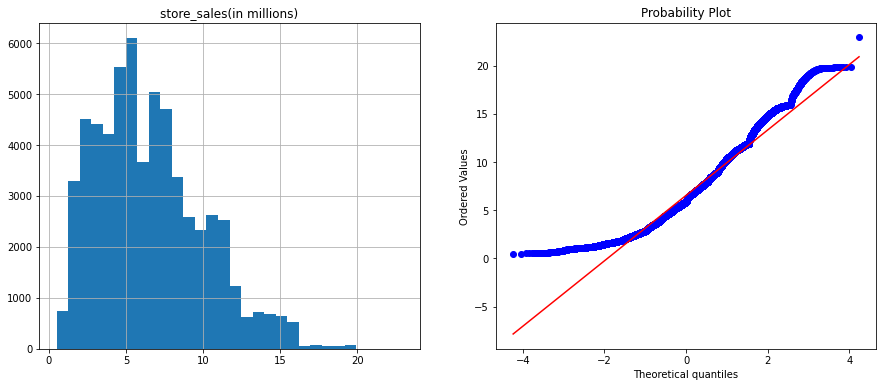

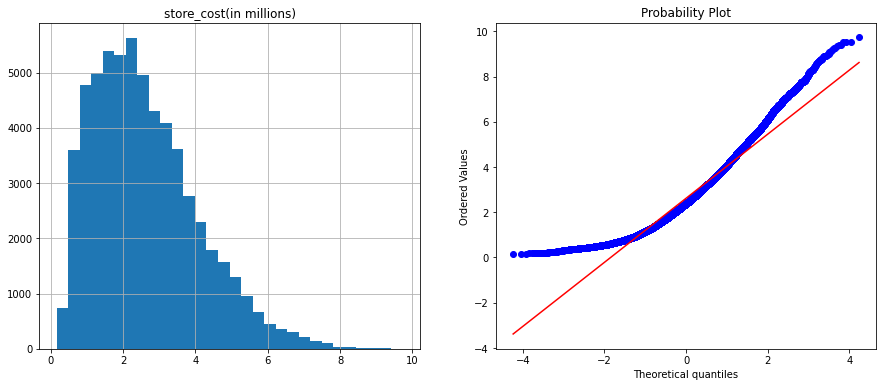

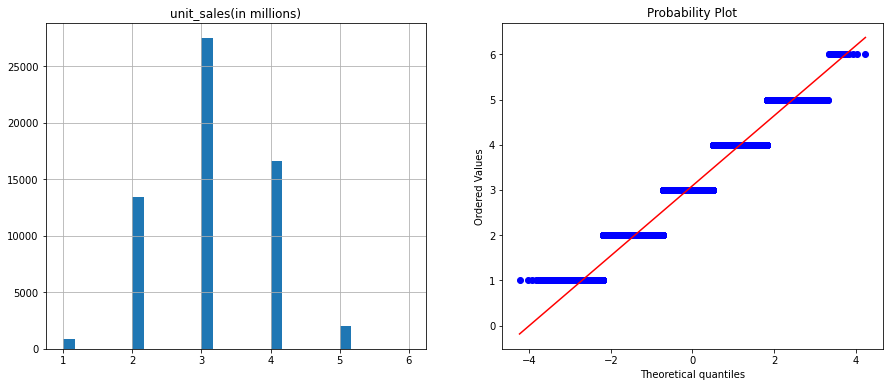

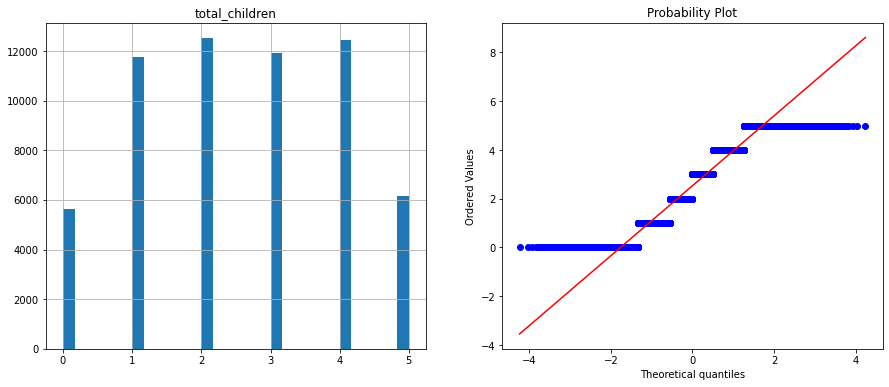

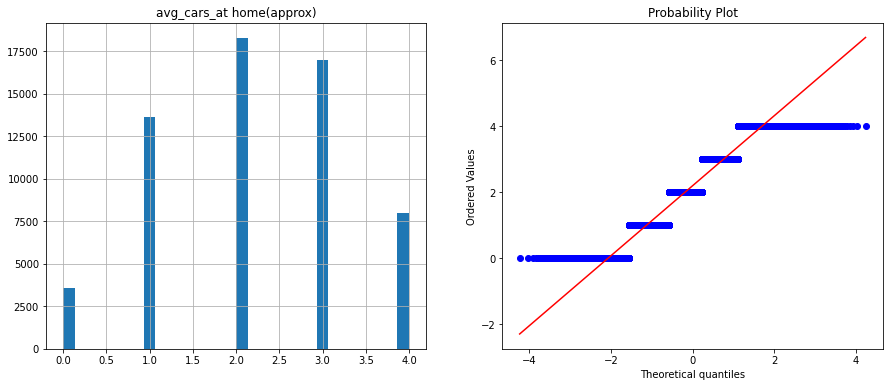

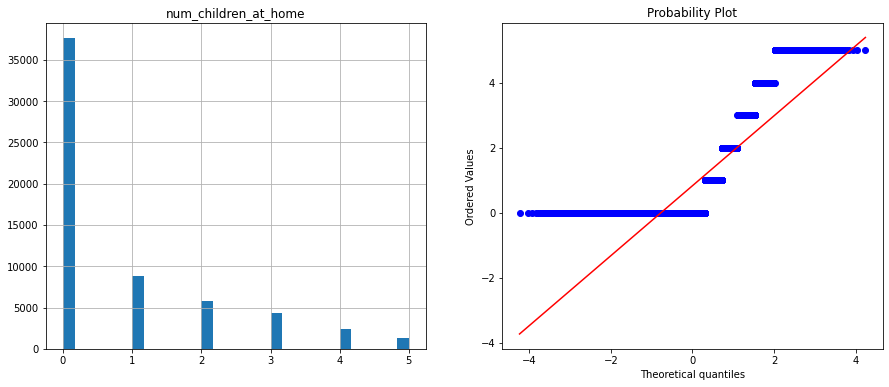

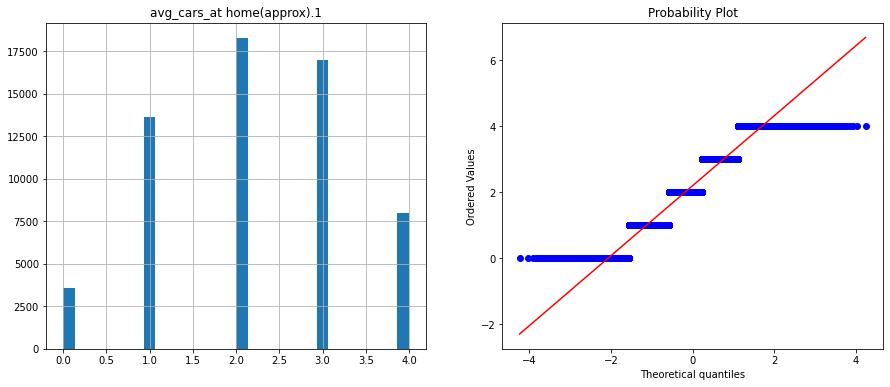

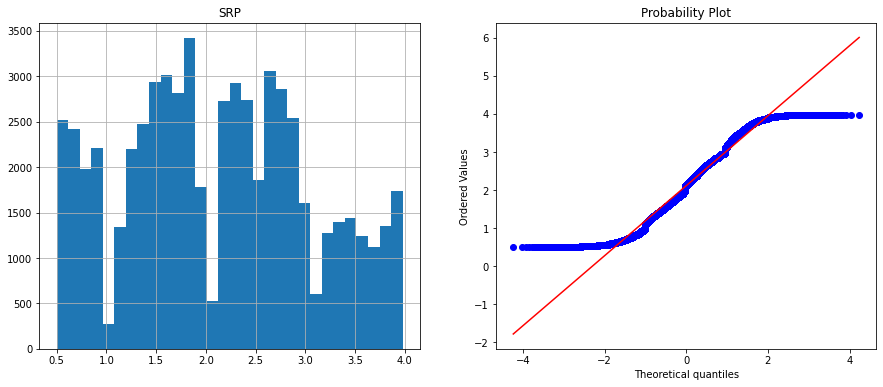

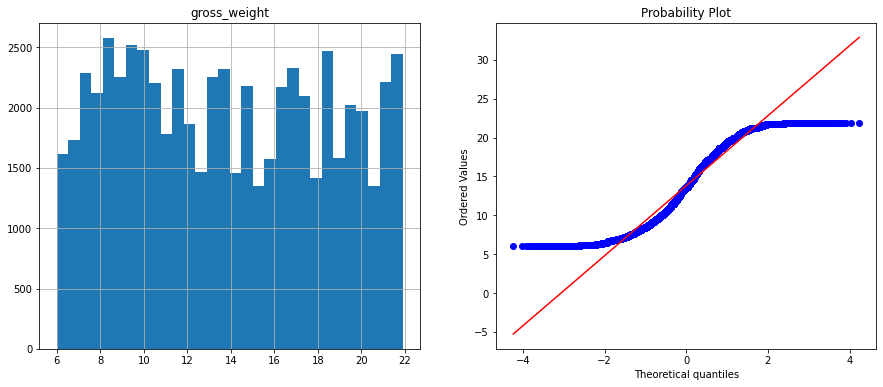

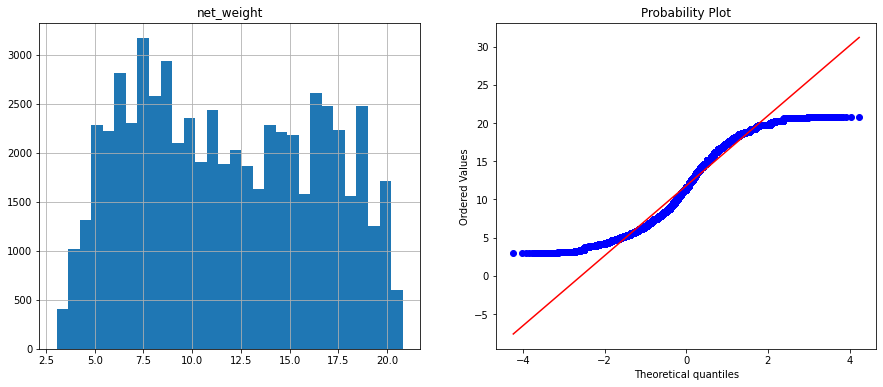

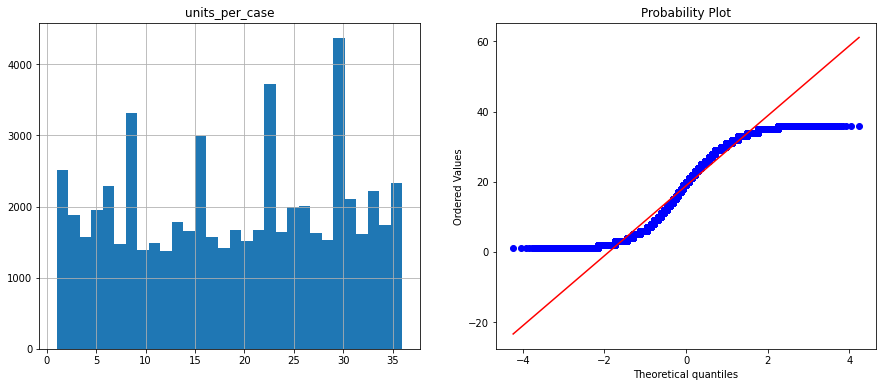

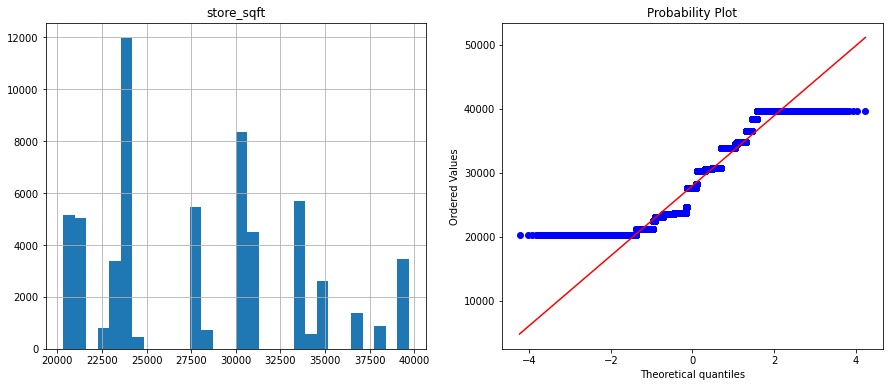

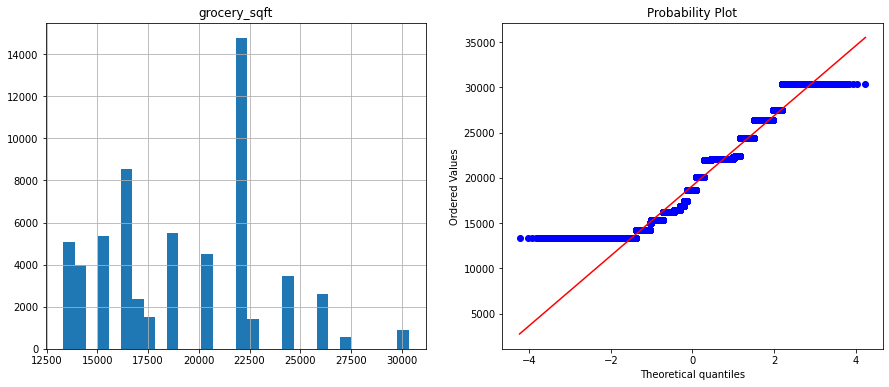

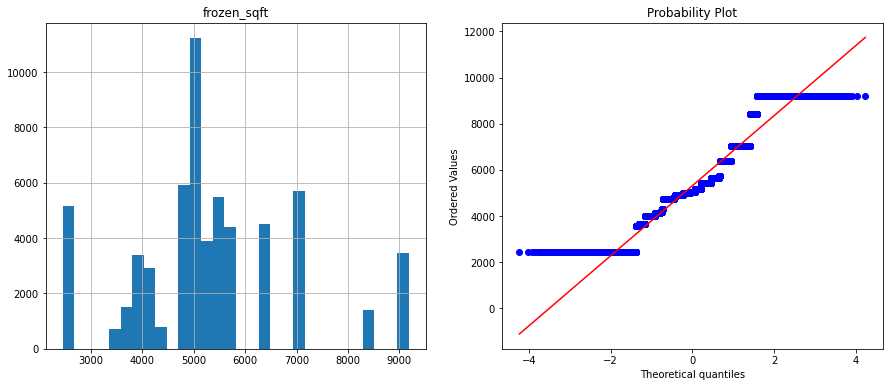

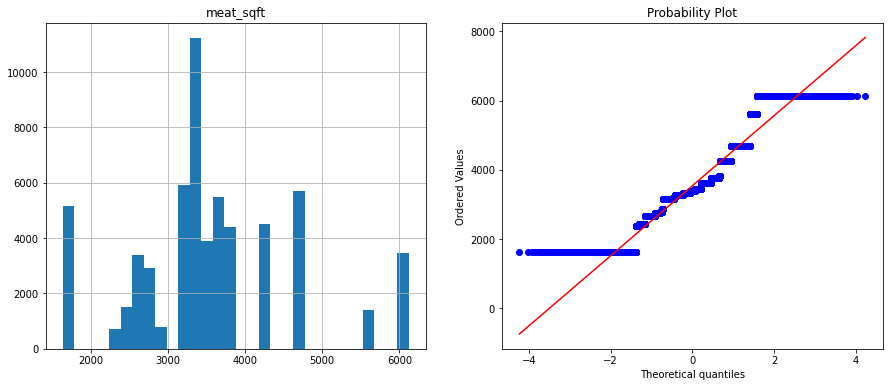

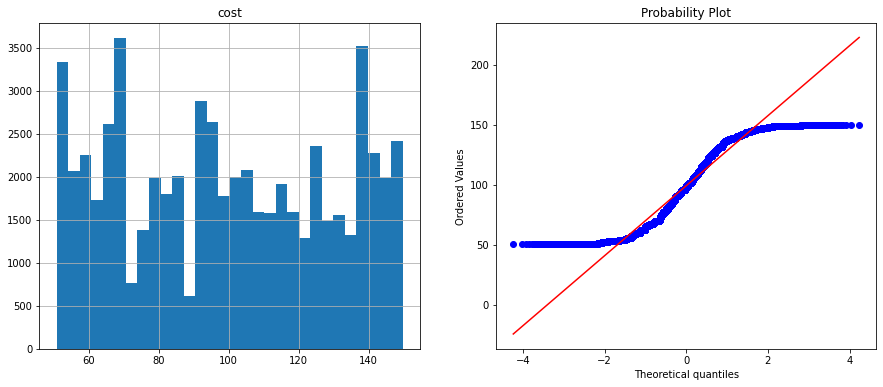

In [61]:
for col in numeric_cont_vars:
        plot_density_variable(df, col)

In [63]:
def getCategoryVars(df):
    colnames = df.columns
    cat_cols = []
    for col in colnames:
        if(df[col].dtype == 'object'):
            cat_cols.append(col)
    return cat_cols

In [64]:
cat_cols = getCategoryVars(df)

In [65]:
cat_cols

['food_category',
 'food_department',
 'food_family',
 'promotion_name',
 'sales_country',
 'marital_status',
 'gender',
 'education',
 'member_card',
 'occupation',
 'houseowner',
 'avg. yearly_income',
 'brand_name',
 'store_type',
 'store_city',
 'store_state',
 'media_type']

In [73]:
X = df.iloc[:, 0:39]
y = df['cost']

In [69]:
X.dtypes

food_category                  object
food_department                object
food_family                    object
store_sales(in millions)      float64
store_cost(in millions)       float64
unit_sales(in millions)       float64
promotion_name                 object
sales_country                  object
marital_status                 object
gender                         object
total_children                float64
education                      object
member_card                    object
occupation                     object
houseowner                     object
avg_cars_at home(approx)      float64
avg. yearly_income             object
num_children_at_home          float64
avg_cars_at home(approx).1    float64
brand_name                     object
SRP                           float64
gross_weight                  float64
net_weight                    float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_type  

In [76]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

X['food_category'] = ord_enc.fit_transform(X[['food_category']])
X['food_department'] = ord_enc.fit_transform(X[['food_department']])
X['food_family'] = ord_enc.fit_transform(X[['food_family']])
X['promotion_name'] = ord_enc.fit_transform(X[['promotion_name']])
X['sales_country'] = ord_enc.fit_transform(X[['sales_country']])
X['marital_status'] = ord_enc.fit_transform(X[['marital_status']])
X['gender'] = ord_enc.fit_transform(X[['gender']])
X['education'] = ord_enc.fit_transform(X[['education']])
X['member_card'] = ord_enc.fit_transform(X[['member_card']])
X['occupation'] = ord_enc.fit_transform(X[['occupation']])
X['houseowner'] = ord_enc.fit_transform(X[['houseowner']])
X['avg. yearly_income'] = ord_enc.fit_transform(X[['avg. yearly_income']])
X['brand_name'] = ord_enc.fit_transform(X[['brand_name']])
X['store_type'] = ord_enc.fit_transform(X[['store_type']])
X['store_city'] = ord_enc.fit_transform(X[['store_city']])
X['media_type'] = ord_enc.fit_transform(X[['media_type']])
X['store_state'] = ord_enc.fit_transform(X[['store_state']])


In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=2022, shuffle=True)

In [80]:
X_train.shape[1]

39

In [81]:
len(y_train.value_counts())

328

In [87]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [88]:
X_train.shape, X_test.shape

((42299, 39), (18129, 39))

In [92]:
entradas = X_train.shape[1]
lr = 0.01
batch_sz=100

regressor = Sequential()
regressor.add(Dense(input_dim=entradas, units=8, kernel_initializer='uniform', activation='relu'))
regressor.add(Dense(units=20, kernel_initializer='uniform', activation='relu'))
regressor.add(Dense(units=20, kernel_initializer='uniform', activation='relu'))
regressor.add(Dense(units=10, kernel_initializer='uniform', activation='relu'))
regressor.add(Dense(units=1, kernel_initializer='uniform', activation='relu'))
regressor.compile(optimizer=Adam(lr), loss='mean_squared_error', metrics=['mean_squared_error']) #regresion.
result1 = regressor.fit(X_train, y_train, batch_size=batch_sz, validation_split=0.2, verbose=1, epochs=100)

Epoch 1/100
339/339 [==============================] - 2s 3ms/step - loss: 1726.4780 - mean_squared_error: 1726.4780 - val_loss: 879.7457 - val_mean_squared_error: 879.7457
Epoch 2/100
339/339 [==============================] - 1s 3ms/step - loss: 871.3992 - mean_squared_error: 871.3992 - val_loss: 869.7227 - val_mean_squared_error: 869.7227
Epoch 3/100
339/339 [==============================] - 1s 2ms/step - loss: 868.7087 - mean_squared_error: 868.7087 - val_loss: 846.1559 - val_mean_squared_error: 846.1559
Epoch 4/100
339/339 [==============================] - 1s 3ms/step - loss: 853.3307 - mean_squared_error: 853.3307 - val_loss: 859.3414 - val_mean_squared_error: 859.3414
Epoch 5/100
339/339 [==============================] - 1s 3ms/step - loss: 838.7506 - mean_squared_error: 838.7506 - val_loss: 828.9110 - val_mean_squared_error: 828.9110
Epoch 6/100
339/339 [==============================] - 1s 3ms/step - loss: 838.7375 - mean_squared_error: 838.7375 - val_loss: 839.7211 - val_m

In [106]:
entradas = X_train.shape[1]
lr = 0.01
batch_sz=150

regressor = Sequential()
regressor.add(Dense(input_dim=entradas, units=20, kernel_initializer='uniform', activation='relu'))
regressor.add(Dense(units=40, kernel_initializer='uniform', activation='relu'))
regressor.add(Dense(units=40, kernel_initializer='uniform', activation='relu'))
regressor.add(Dense(units=40, kernel_initializer='uniform', activation='relu'))
regressor.add(Dense(units=40, kernel_initializer='uniform', activation='relu'))
regressor.add(Dense(units=20, kernel_initializer='uniform', activation='relu'))
regressor.add(Dense(units=10, kernel_initializer='uniform', activation='relu'))
regressor.add(Dense(units=1, kernel_initializer='uniform', activation='relu'))
regressor.compile(optimizer=Adam(lr), loss='mean_squared_error', metrics=['mean_squared_error']) #regresion.
result1 = regressor.fit(X_train, y_train, batch_size=batch_sz, validation_split=0.2, verbose=1, epochs=150)

Epoch 1/150
226/226 [==============================] - 2s 4ms/step - loss: 1736.0364 - mean_squared_error: 1736.0364 - val_loss: 872.3386 - val_mean_squared_error: 872.3386
Epoch 2/150
226/226 [==============================] - 1s 4ms/step - loss: 881.8400 - mean_squared_error: 881.8400 - val_loss: 895.7883 - val_mean_squared_error: 895.7883
Epoch 3/150
226/226 [==============================] - 1s 4ms/step - loss: 862.4769 - mean_squared_error: 862.4769 - val_loss: 837.4987 - val_mean_squared_error: 837.4987
Epoch 4/150
226/226 [==============================] - 1s 4ms/step - loss: 836.4478 - mean_squared_error: 836.4478 - val_loss: 813.7457 - val_mean_squared_error: 813.7457
Epoch 5/150
226/226 [==============================] - 1s 4ms/step - loss: 839.5308 - mean_squared_error: 839.5308 - val_loss: 821.4521 - val_mean_squared_error: 821.4521
Epoch 6/150
226/226 [==============================] - 1s 4ms/step - loss: 821.6224 - mean_squared_error: 821.6224 - val_loss: 824.0247 - val_m

In [108]:
predann = regressor.predict(X_test)

In [109]:
from sklearn.metrics import r2_score

In [161]:
r2 = r2_score(y_true=y_test, y_pred=predann)
r2

0.964476644848582

In [111]:
from sklearn.metrics import median_absolute_error

In [163]:
mae = median_absolute_error(y_true=y_test, y_pred=predann)
mae

1.7109472656249949

In [113]:
from sklearn.metrics import mean_squared_error

In [164]:
mse = mean_squared_error(y_true=y_test, y_pred=predann)
mse

32.009153933472604

In [115]:
from sklearn.decomposition import PCA

In [146]:
pca = PCA(n_components=33)

In [147]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [148]:
pca.explained_variance_ratio_


array([0.12966831, 0.08571747, 0.07630343, 0.07501033, 0.05258707,
       0.05023687, 0.04134245, 0.03418767, 0.02998998, 0.02967268,
       0.02923238, 0.02701952, 0.02646267, 0.02618912, 0.02519302,
       0.02501044, 0.02475062, 0.02394165, 0.02361968, 0.02282656,
       0.02238005, 0.01981667, 0.01956316, 0.0171794 , 0.01185166,
       0.00944902, 0.00931724, 0.00821287, 0.00766804, 0.00651281,
       0.00483017, 0.00185342, 0.00158229])

In [149]:
np.sum(pca.explained_variance_ratio_)

0.9991787246863276

In [150]:
np.round(pca.components_, 2)

array([[ 0.  ,  0.  , -0.  , ..., -0.41, -0.32, -0.1 ],
       [-0.  , -0.01, -0.  , ..., -0.04, -0.26,  0.03],
       [ 0.05,  0.06,  0.04, ..., -0.  ,  0.01,  0.01],
       ...,
       [ 0.  , -0.  ,  0.  , ..., -0.03, -0.29,  0.01],
       [ 0.  ,  0.  , -0.  , ...,  0.  ,  0.01, -0.  ],
       [-0.  ,  0.  , -0.  , ..., -0.01,  0.4 ,  0.01]])

In [152]:
entradas = X_train_pca.shape[1]
lr = 0.01
batch_sz=150

regressor = Sequential()
regressor.add(Dense(input_dim=entradas, units=20, kernel_initializer='uniform', activation='relu'))
regressor.add(Dense(units=40, kernel_initializer='uniform', activation='relu'))
regressor.add(Dense(units=40, kernel_initializer='uniform', activation='relu'))
regressor.add(Dense(units=40, kernel_initializer='uniform', activation='relu'))
regressor.add(Dense(units=40, kernel_initializer='uniform', activation='relu'))
regressor.add(Dense(units=20, kernel_initializer='uniform', activation='relu'))
regressor.add(Dense(units=10, kernel_initializer='uniform', activation='relu'))
regressor.add(Dense(units=1, kernel_initializer='uniform', activation='relu'))
regressor.compile(optimizer=Adam(lr), loss='mean_squared_error', metrics=['mean_squared_error']) #regresion.
result1_pca = regressor.fit(X_train_pca, y_train, batch_size=batch_sz, validation_split=0.2, verbose=1, epochs=150)

Epoch 1/150
226/226 [==============================] - 2s 5ms/step - loss: 1823.3168 - mean_squared_error: 1823.3169 - val_loss: 917.3347 - val_mean_squared_error: 917.3347
Epoch 2/150
226/226 [==============================] - 1s 4ms/step - loss: 862.6578 - mean_squared_error: 862.6578 - val_loss: 894.1925 - val_mean_squared_error: 894.1925
Epoch 3/150
226/226 [==============================] - 1s 4ms/step - loss: 844.4297 - mean_squared_error: 844.4297 - val_loss: 865.4209 - val_mean_squared_error: 865.4209
Epoch 4/150
226/226 [==============================] - 1s 4ms/step - loss: 830.6027 - mean_squared_error: 830.6027 - val_loss: 809.0566 - val_mean_squared_error: 809.0566
Epoch 5/150
226/226 [==============================] - 1s 4ms/step - loss: 804.1478 - mean_squared_error: 804.1478 - val_loss: 786.6732 - val_mean_squared_error: 786.6733
Epoch 6/150
226/226 [==============================] - 1s 4ms/step - loss: 797.9079 - mean_squared_error: 797.9079 - val_loss: 794.3076 - val_m

In [153]:
predann_pca = regressor.predict(X_test_pca)

In [166]:
r2_pca = r2_score(y_true=y_test, y_pred=predann_pca)
r2_pca

0.9928939082317909

In [168]:
mae_pca = median_absolute_error(y_true=y_test, y_pred=predann_pca)
mae_pca

0.9911129760742199

In [170]:
mse_pca = mean_squared_error(y_true=y_test, y_pred=predann_pca)
mse_pca

6.403110975988663

In [183]:
r2, r2_pca


(0.964476644848582, 0.9928939082317909)

In [184]:
 mae, mae_pca


(1.7109472656249949, 0.9911129760742199)

In [185]:
 mse, mse_pca

(32.009153933472604, 6.403110975988663)

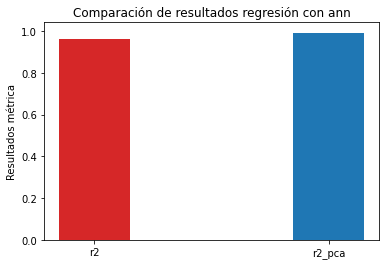

In [211]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

results = ['r2', 'r2_pca']
counts = [0.964476644848582, 0.9928939082317909]
bar_labels = ['r2', 'r2_pca']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(results, counts, label=bar_labels, color=bar_colors,  width=0.3)

ax.set_ylabel('Resultados métrica')
ax.set_title('Comparación de resultados regresión con ann')


plt.show()

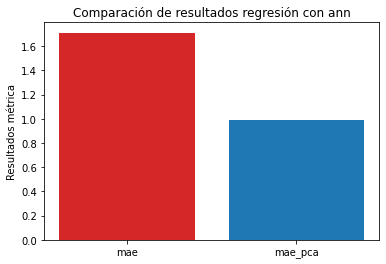

In [206]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

results = [ 'mae', 'mae_pca']
counts = [ 1.7109472656249949, 0.9911129760742199]
bar_labels = ['mae', 'mae_pca']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(results, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Resultados métrica')
ax.set_title('Comparación de resultados regresión con ann')


plt.show()

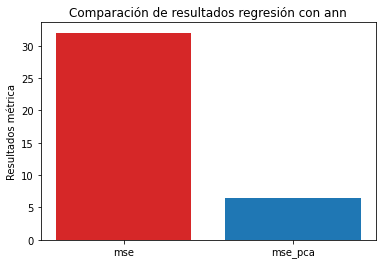

In [207]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

results = [ 'mse', 'mse_pca']
counts = [ 32.009153933472604, 6.403110975988663]
bar_labels = [ 'mse', 'mse_pca']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(results, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Resultados métrica')
ax.set_title('Comparación de resultados regresión con ann')


plt.show()